# Task

* a = -2.28
* b = 2.98
* c = 7.58
* d = 9.11

4. Solve analytically the ODE in the form of:
   
$a \cdot \ddot{x} + b \cdot \dot{x} + c \cdot x = d$

4. From the list take coefficients of your ODE and solve them with three integrators: Explicit/Implicit Euler, Rung-Kutta methods.
5. Compare results of these methods with analytical solution, dicsuss and conclude your thoughts in the .pdf report.
6. Name of the report should be "Your_ISU_number_YourName_task1.pdf"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t

* Standart view of the equation:

$$\ddot{x} + \frac{b}{a} \cdot \dot{x} + \frac{c}{a} \cdot x = \frac{d}{a}$$

### Analytic solution

$$\ddot{x} + \frac{b}{a} \cdot \dot{x} + \frac{c}{a} \cdot x = 0$$
$$x(t) = e^{\lambda \cdot t}$$
$$\lambda^2 + \frac{b}{a} \cdot \lambda + \frac{c}{a} = 0$$

In [13]:
a = -2.28
b = 2.98
c = 7.58
d = 9.11

D = (b/a)**2 - 4 * (c/a)
print(D)
if D > 0:
    C1 = (-b + np.sqrt(D)) / (2 * a)
    C2 = (-b - np.sqrt(D)) / (2 * a)
    print(f'C1: {C1},\nC2: {C2}')
elif D == 0:
    C = (-b) / (2 * a)
    print(f'C: {C}')

15.006540473991999
C1: -0.1960148302074309,
C2: 1.5030323740670801


### Numerical solution

$$-2.28x'' + 2.98x' + 7.58x = 9.11$$

* first-order ODE:
$$y_1 = x$$
$$y_2 = x' = y_1'$$

* solution:
$$y_1' = y_2$$
$$y_2' = \frac{d - b \cdot y_2 - c \cdot y_1}{a}$$

In [14]:
def Dynamics(y):
    dydt = np.array([y[1], (d - b * y[1] - c * y[0]) / (a)])
    return dydt

# Initial states
x0 = np.array([0.1, 0.0])   # [angle, angular_velocity]
Tf = 10.0
h = 0.01

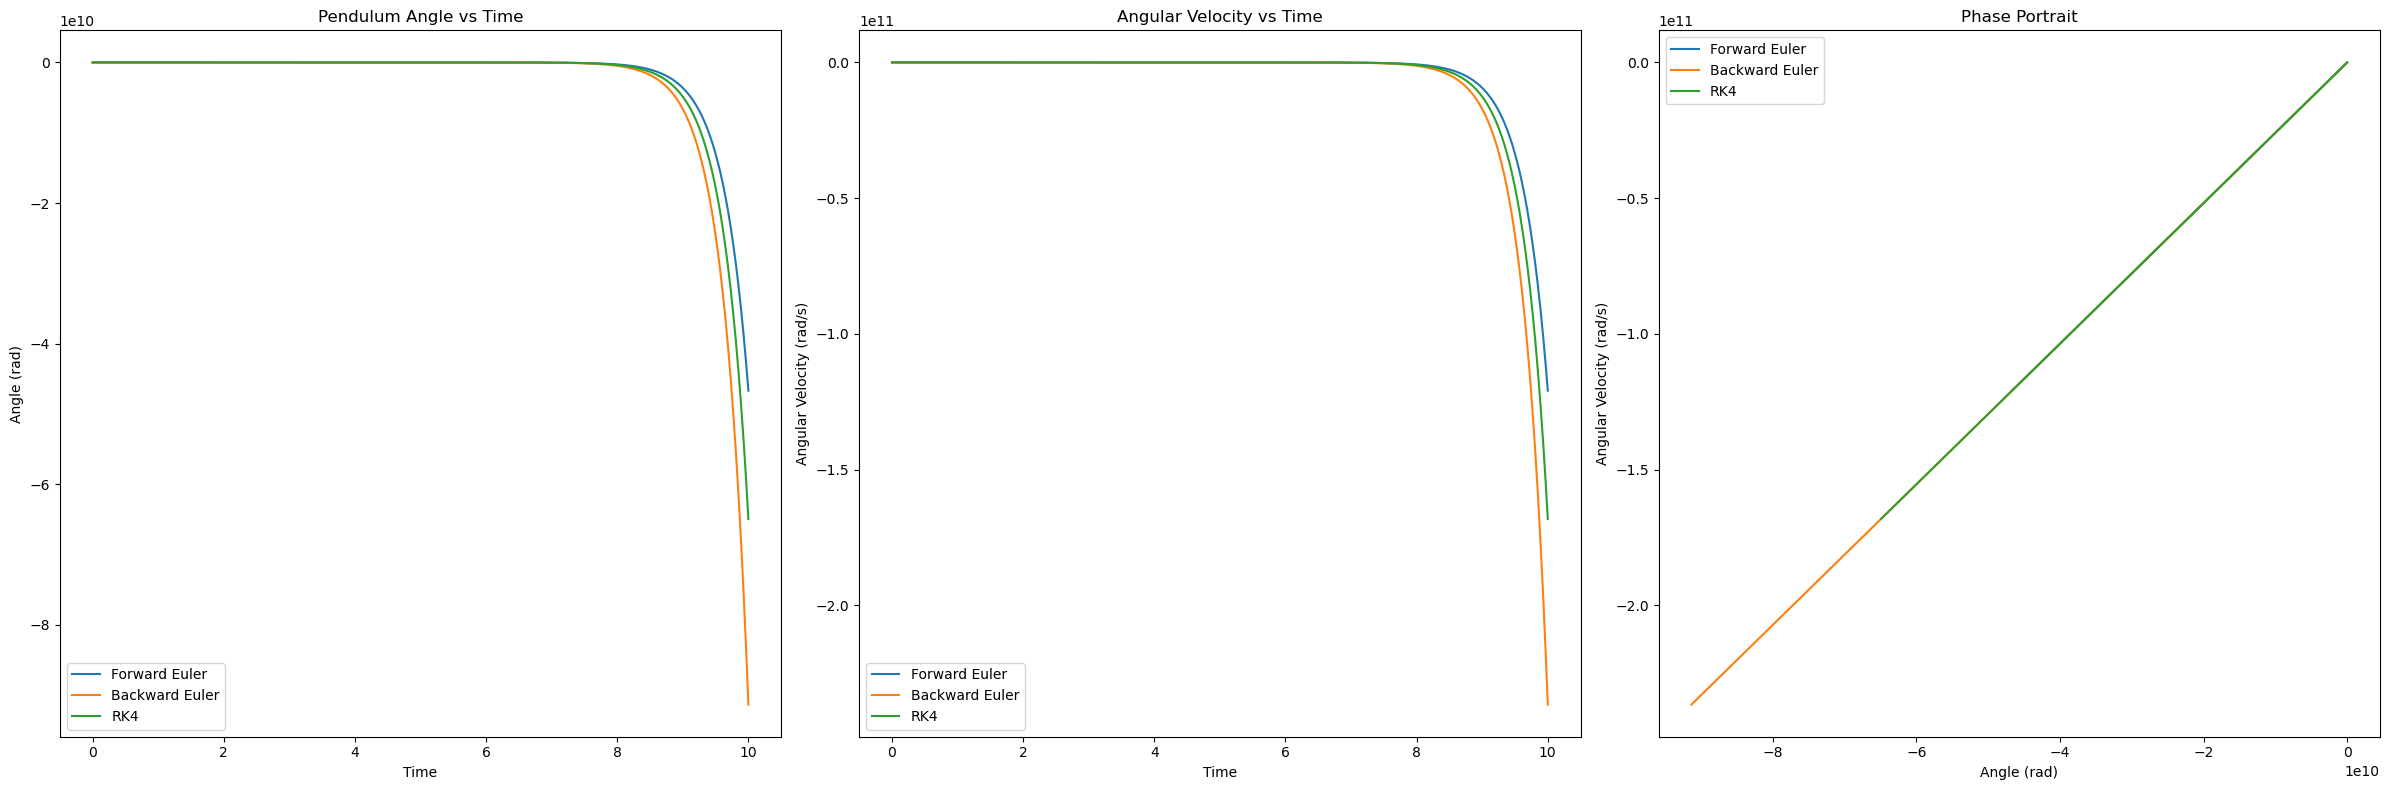

In [15]:
# Forward Euler
x_fe, t_fe = forward_euler(Dynamics, x0, Tf, h)

# Backward Euler  
x_be, t_be = backward_euler(Dynamics, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(Dynamics, x0, Tf, h)

# Plot results
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(t_fe, x_fe[0, :], label='Forward Euler')
plt.plot(t_be, x_be[0, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum Angle vs Time')

plt.subplot(1, 3, 2)
plt.plot(t_fe, x_fe[1, :], label='Forward Euler')
plt.plot(t_be, x_be[1, :], label='Backward Euler') 
plt.plot(t_rk4, x_rk4[1, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Angular Velocity vs Time')

plt.subplot(1, 3, 3)
plt.plot(x_fe[0, :], x_fe[1, :], label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], label='RK4')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Phase Portrait')

plt.tight_layout()
plt.show()

Решаем численными методами...
Дискриминант характеристического уравнения: 78.00999999999999
Два действительных корня: λ1 = -1.2834, λ2 = 2.5904


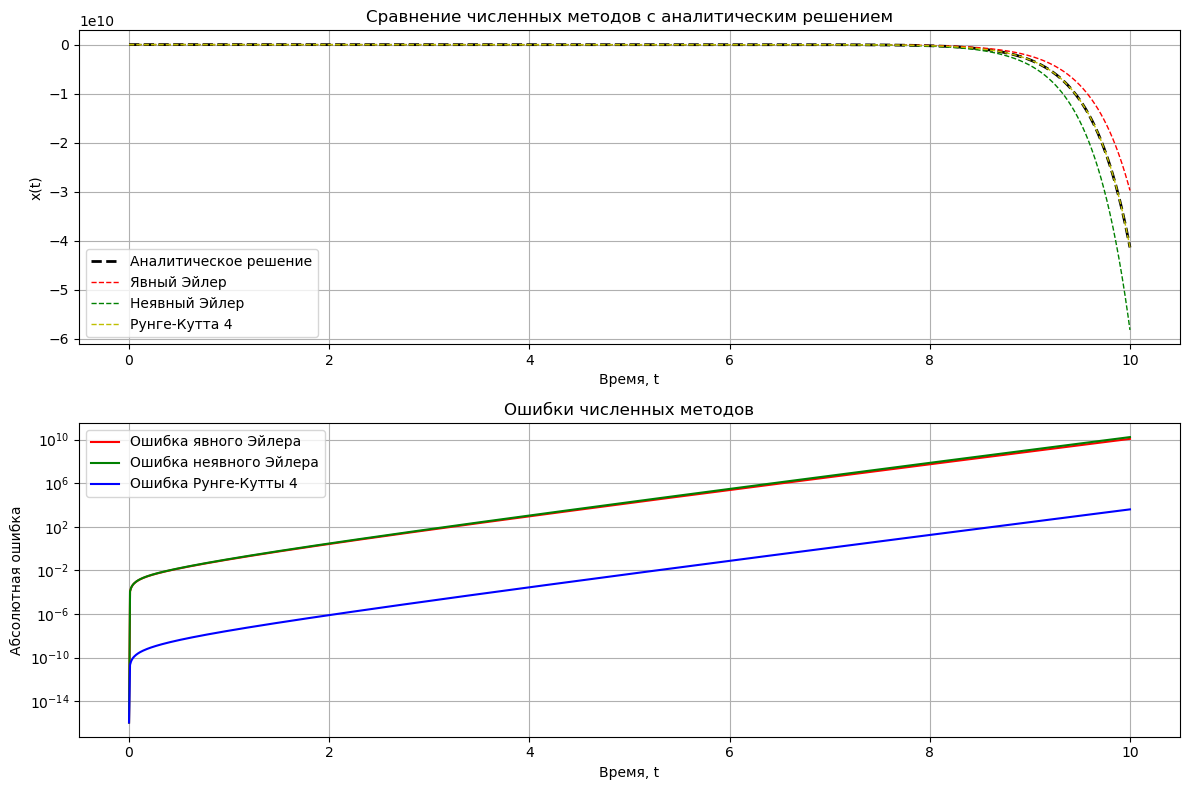


Статистика ошибок (средняя абсолютная ошибка):
Явный Эйлер: 4.391236e+08
Неявный Эйлер: 6.282822e+08
Рунге-Кутта 4: 1.478303e+02

Максимальная ошибка:
Явный Эйлер: 1.161888e+10
Неявный Эйлер: 1.682939e+10
Рунге-Кутта 4: 3.933941e+03


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t

# Параметры уравнения
a = -2.28
b = 2.98
c = 7.58
d = 9.11

# Определяем функцию правой части для системы ОДУ
def my_ode_system(y):
    """
    Преобразуем уравнение 2-го порядка в систему 1-го порядка:
    a*x'' + b*x' + c*x = d
    
    y[0] = x (положение)
    y[1] = x' (скорость)
    """
    x, x_dot = y
    # Из уравнения: x'' = (d - b*x' - c*x) / a
    x_ddot = (d - b*x_dot - c*x) / a
    
    return np.array([x_dot, x_ddot])

# Параметры интегрирования
x0 = np.array([0.5, 0.0])  # Начальные условия: [положение, скорость]
Tf = 10.0                   # Время интегрирования
h = 0.01                    # Шаг интегрирования

# Решаем численными методами
print("Решаем численными методами...")
y_explicit, t_explicit = forward_euler(my_ode_system, x0, Tf, h)
y_implicit, t_implicit = backward_euler(my_ode_system, x0, Tf, h)
y_rk4, t_rk4 = runge_kutta4(my_ode_system, x0, Tf, h)

# Аналитическое решение
# Сначала найдем корни характеристического уравнения
# a*λ² + b*λ + c = 0
A = a
B = b
C = c

# Характеристическое уравнение: A*λ² + B*λ + C = 0
discriminant = B**2 - 4*A*C
print(f"Дискриминант характеристического уравнения: {discriminant}")

if discriminant > 0:
    # Два различных действительных корня
    lambda1 = (-B + np.sqrt(discriminant)) / (2*A)
    lambda2 = (-B - np.sqrt(discriminant)) / (2*A)
    print(f"Два действительных корня: λ1 = {lambda1:.4f}, λ2 = {lambda2:.4f}")
    
    # Частное решение (для постоянной правой части)
    x_particular = d / c
    
    # Общее решение: x(t) = C1*exp(λ1*t) + C2*exp(λ2*t) + x_particular
    # Находим C1 и C2 из начальных условий
    # x(0) = C1 + C2 + x_particular = 0.5
    # x'(0) = λ1*C1 + λ2*C2 = 0
    
    # Решаем систему:
    # C1 + C2 = 0.5 - x_particular
    # λ1*C1 + λ2*C2 = 0
    
    A_matrix = np.array([[1, 1], [lambda1, lambda2]])
    b_vector = np.array([x0[0] - x_particular, x0[1]])
    C1, C2 = np.linalg.solve(A_matrix, b_vector)
    
    def analytical_solution(t):
        return C1 * np.exp(lambda1 * t) + C2 * np.exp(lambda2 * t) + x_particular
        
elif discriminant == 0:
    # Один кратный корень
    lambda_val = -B / (2*A)
    print(f"Один кратный корень: λ = {lambda_val:.4f}")
    
    # Частное решение
    x_particular = d / c
    
    # Общее решение: x(t) = (C1 + C2*t)*exp(λ*t) + x_particular
    # Находим C1 и C2 из начальных условий
    # x(0) = C1 + x_particular = 0.5
    # x'(0) = λ*C1 + C2 = 0
    
    C1 = x0[0] - x_particular
    C2 = -lambda_val * C1
    
    def analytical_solution(t):
        return (C1 + C2 * t) * np.exp(lambda_val * t) + x_particular
    
else:
    # Комплексные корни
    real_part = -B / (2*A)
    imag_part = np.sqrt(-discriminant) / (2*A)
    print(f"Комплексные корни: {real_part:.4f} ± {imag_part:.4f}i")
    
    # Частное решение
    x_particular = d / c
    
    # Общее решение: x(t) = exp(α*t)*(C1*cos(β*t) + C2*sin(β*t)) + x_particular
    # где α = real_part, β = imag_part
    # Находим C1 и C2 из начальных условий
    # x(0) = C1 + x_particular = 0.5
    # x'(0) = α*C1 + β*C2 = 0
    
    C1 = x0[0] - x_particular
    C2 = (-real_part * C1) / imag_part
    
    def analytical_solution(t):
        return np.exp(real_part * t) * (C1 * np.cos(imag_part * t) + C2 * np.sin(imag_part * t)) + x_particular

# Вычисляем аналитическое решение
x_analytical = analytical_solution(t_explicit)

# Визуализация результатов
plt.figure(figsize=(12, 8))

# График решений
plt.subplot(2, 1, 1)
plt.plot(t_explicit, x_analytical, 'k--', linewidth=2, label='Аналитическое решение')
plt.plot(t_explicit, y_explicit[0, :], 'r--', linewidth=1, label='Явный Эйлер')
plt.plot(t_implicit, y_implicit[0, :], 'g--', linewidth=1, label='Неявный Эйлер')
plt.plot(t_rk4, y_rk4[0, :], 'y--', linewidth=1, label='Рунге-Кутта 4')
plt.xlabel('Время, t')
plt.ylabel('x(t)')
plt.title('Сравнение численных методов с аналитическим решением')
plt.legend()
plt.grid(True)

# График ошибок
plt.subplot(2, 1, 2)
error_explicit = np.abs(y_explicit[0, :] - x_analytical)
error_implicit = np.abs(y_implicit[0, :len(t_explicit)] - x_analytical)
error_rk4 = np.abs(y_rk4[0, :] - x_analytical)

plt.plot(t_explicit, error_explicit, 'r-', label='Ошибка явного Эйлера')
plt.plot(t_explicit, error_implicit, 'g-', label='Ошибка неявного Эйлера')
plt.plot(t_explicit, error_rk4, 'b-', label='Ошибка Рунге-Кутты 4')
plt.xlabel('Время, t')
plt.ylabel('Абсолютная ошибка')
plt.title('Ошибки численных методов')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Логарифмическая шкала для лучшего отображения ошибок

plt.tight_layout()
plt.show()

# Вывод статистики по ошибкам
print("\nСтатистика ошибок (средняя абсолютная ошибка):")
print(f"Явный Эйлер: {np.mean(error_explicit):.6e}")
print(f"Неявный Эйлер: {np.mean(error_implicit):.6e}")
print(f"Рунге-Кутта 4: {np.mean(error_rk4):.6e}")

print(f"\nМаксимальная ошибка:")
print(f"Явный Эйлер: {np.max(error_explicit):.6e}")
print(f"Неявный Эйлер: {np.max(error_implicit):.6e}")
print(f"Рунге-Кутта 4: {np.max(error_rk4):.6e}")